<a href="https://colab.research.google.com/github/ogbemi-ejegi/employee_layoff/blob/main/layoffs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Imports packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator

#Read dataset from folder
df_layoffs = pd.read_csv('/content/layoffs.csv')1
df_layoffs.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,SIRCLO,Jakarta,Retail,160.0,0.08,2022-11-22,Series B,Indonesia,92.0
1,Trax,Singapore,Retail,80.0,0.08,2022-11-22,Series E,Singapore,1000.0
2,Kitopi,Dubai,Food,93.0,0.10,2022-11-21,Series C,United States,804.0
3,Zomato,Gurugram,Food,100.0,0.04,2022-11-19,Series J,India,914.0
4,Carvana,Phoenix,Transportation,1500.0,0.08,2022-11-18,IPO,United States,1600.0


In [ ]:
df_layoffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              1659 non-null   object 
 1   location             1659 non-null   object 
 2   industry             1656 non-null   object 
 3   total_laid_off       1179 non-null   float64
 4   percentage_laid_off  1110 non-null   float64
 5   date                 1659 non-null   object 
 6   stage                1655 non-null   object 
 7   country              1659 non-null   object 
 8   funds_raised         1544 non-null   float64
dtypes: float64(3), object(6)
memory usage: 116.8+ KB


In [ ]:
df_layoffs.isnull().sum()

company                  0
location                 0
industry                 3
total_laid_off         480
percentage_laid_off    549
date                     0
stage                    4
country                  0
funds_raised           115
dtype: int64

In [ ]:
df_layoffs.describe()

,total_laid_off,percentage_laid_off,funds_raised
count,1179.000000,1110.000000,1544.000000
mean,198.034775,0.275070,888.407575
std,576.963286,0.265643,6514.276406
min,3.000000,0.000000,0.000000
25%,31.000000,0.100000,43.600000
50%,70.000000,0.190000,130.000000
75%,150.000000,0.320000,377.250000
max,11000.000000,1.000000,121900.000000


In [ ]:
df_layoffs.shape

(1659, 9)

In [ ]:
#Let's assume we have at least one laid off person to fill the missing laid of column
df_layoffs['total_laid_off'] = df_layoffs['total_laid_off'].fillna(1)
print(df_layoffs.isnull().sum())

company                  0
location                 0
industry                 3
total_laid_off           0
percentage_laid_off    549
date                     0
stage                    4
country                  0
funds_raised           115
dtype: int64


In [ ]:
#top_companies = df_layoffs.nlargest(10,['total_laid_off'])
#plt.bar(top_companies.company, top_companies.total_laid_off)
#plt.xticks(rotation = 70)
#plt.title('Companies with highest laid off')
#plt.show()

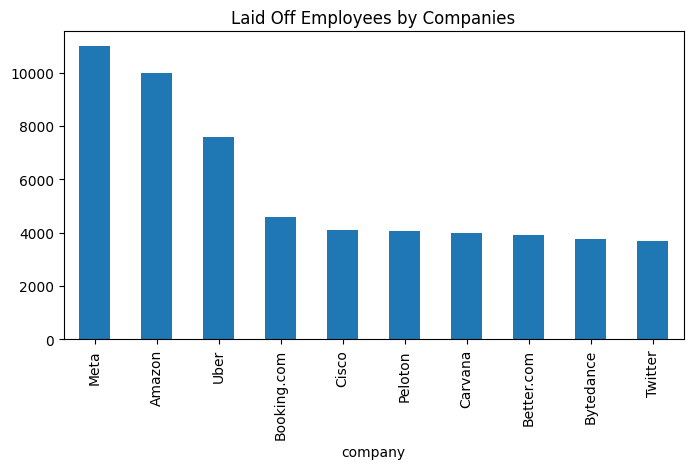

In [ ]:
plt.figure(figsize= (8, 4))
industry_val = df_layoffs.groupby('company')['total_laid_off'].sum().sort_values(ascending = False).head(10)
industry_val.plot(label="", kind='bar')
plt.title('Laid Off Employees by Companies')
plt.show()

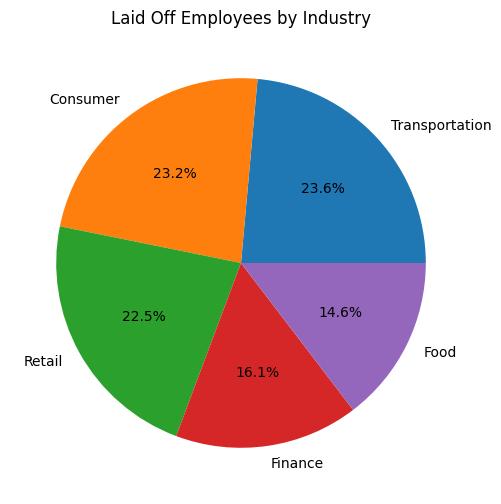

In [ ]:
# group the data by industry and sum the total laid off employees
industry_val = df_layoffs.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head()

# create the pie chart and display the labels and values inside the pie
plt.figure(figsize=(8, 6))
plt.pie(industry_val, labels=industry_val.index, autopct='%1.1f%%')
plt.title('Laid Off Employees by Industry')
plt.show()

In [ ]:
df_layoffs.dtypes

company                 object
location                object
industry                object
total_laid_off         float64
percentage_laid_off    float64
date                    object
stage                   object
country                 object
funds_raised           float64
dtype: object

In [ ]:
df_layoffs.columns

Index(['company', 'location', 'industry', 'total_laid_off',
       'percentage_laid_off', 'date', 'stage', 'country', 'funds_raised'],
      dtype='object')

In [ ]:
df_layoffs.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,SIRCLO,Jakarta,Retail,160.0,0.08,2022-11-22,Series B,Indonesia,92.0
1,Trax,Singapore,Retail,80.0,0.08,2022-11-22,Series E,Singapore,1000.0
2,Kitopi,Dubai,Food,93.0,0.10,2022-11-21,Series C,United States,804.0
3,Zomato,Gurugram,Food,100.0,0.04,2022-11-19,Series J,India,914.0
4,Carvana,Phoenix,Transportation,1500.0,0.08,2022-11-18,IPO,United States,1600.0


In [ ]:
df_date = df_layoffs.groupby('date')['total_laid_off'].sum()

In [ ]:
df_date

date
2020-03-11      75.0
2020-03-12      20.0
2020-03-13      14.0
2020-03-16     147.0
2020-03-18       4.0
               ...  
2022-11-17     712.0
2022-11-18    1804.0
2022-11-19     100.0
2022-11-21      93.0
2022-11-22     240.0
Name: total_laid_off, Length: 394, dtype: float64

In [ ]:
'''
plt.figure(figsize=(16, 10))
plt.plot(df_date.index, df_date.values)
plt.xlabel('Date')
plt.ylabel('Total Laid Off')
plt.title('Laid Off Trend Over Time')
plt.xticks(rotation=45)
plt.show()
'''

"\nplt.figure(figsize=(16, 10))\nplt.plot(df_date.index, df_date.values)\nplt.xlabel('Date')\nplt.ylabel('Total Laid Off')\nplt.title('Laid Off Trend Over Time')\nplt.xticks(rotation=45)\nplt.show()\n"

In [ ]:
df_layoffs.tail()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
1654,Service,Los Angeles,Travel,1.0,1.00,2020-03-16,Seed,United States,5.1
1655,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,2020-03-13,Unknown,United States,45.0
1656,Panda Squad,SF Bay Area,Consumer,6.0,0.75,2020-03-13,Seed,United States,1.0
1657,Tamara Mellon,Los Angeles,Retail,20.0,0.40,2020-03-12,Series C,United States,90.0
1658,EasyPost,Salt Lake City,Logistics,75.0,NaN,2020-03-11,Series A,United States,12.0


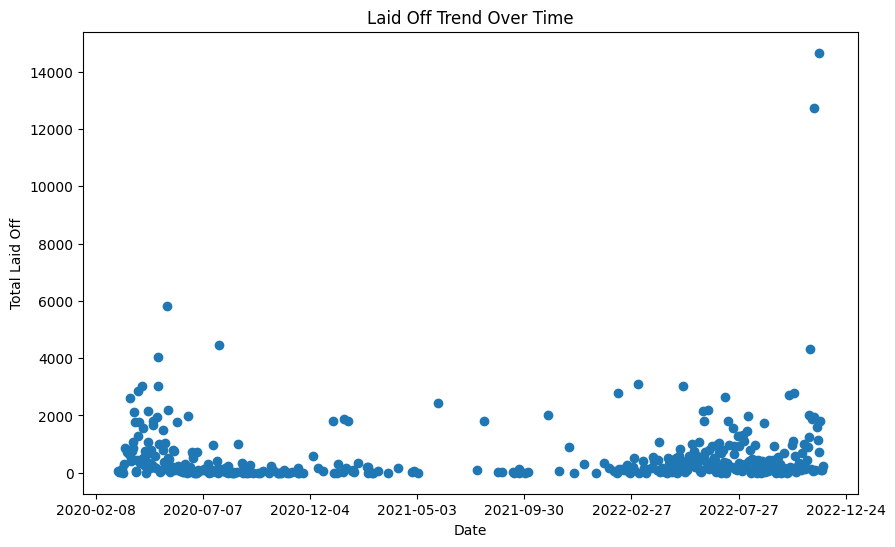

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_date.index, df_date.values)
plt.xlabel('Date')
plt.ylabel('Total Laid Off')
plt.title('Laid Off Trend Over Time')


# Use MaxNLocator to reduce the number of xticks
locator = MaxNLocator(nbins=10)
plt.gca().xaxis.set_major_locator(locator)

plt.show()


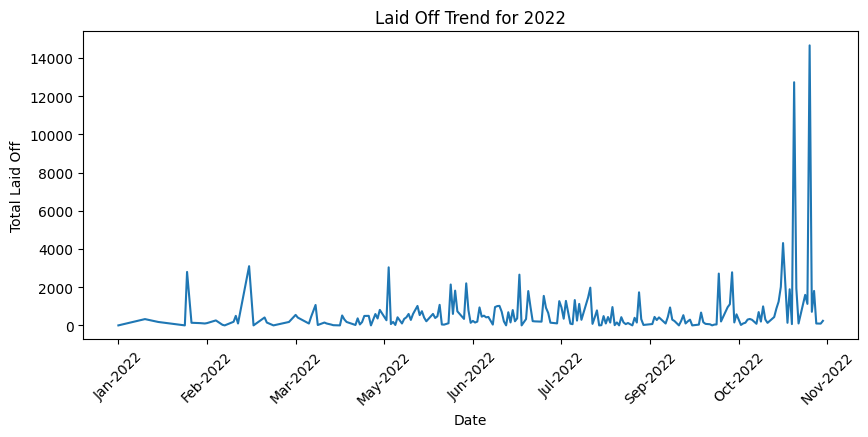

In [ ]:
# convert date column to datetime object
df_layoffs['date'] = pd.to_datetime(df_layoffs['date'])

# select data for one-year duration starting from January 1st, 2022
start_date = pd.Timestamp('2022-01-01')
end_date = start_date + pd.DateOffset(years=1)
df_one_year = df_layoffs.loc[(df_layoffs['date'] >= start_date) & (df_layoffs['date'] < end_date)]

# plot the selected data
df_date = df_one_year.groupby('date')['total_laid_off'].sum()
plt.figure(figsize=(10, 4))
plt.plot(df_date.index, df_date.values)
plt.xlabel('Date')
plt.ylabel('Total Laid Off')
plt.title('Laid Off Trend for 2022')
plt.xticks(rotation=45)
# set the format of the x-axis labels to show Month-Year
date_fmt = mdates.DateFormatter('%b-%Y')
plt.gca().xaxis.set_major_formatter(date_fmt)

# Use MaxNLocator to reduce the number of xticks
locator = MaxNLocator(nbins=10)
plt.gca().xaxis.set_major_locator(locator)

plt.show()


<ipython-input-19-b5abffc18eba>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['year'] = df_filtered['date'].dt.year


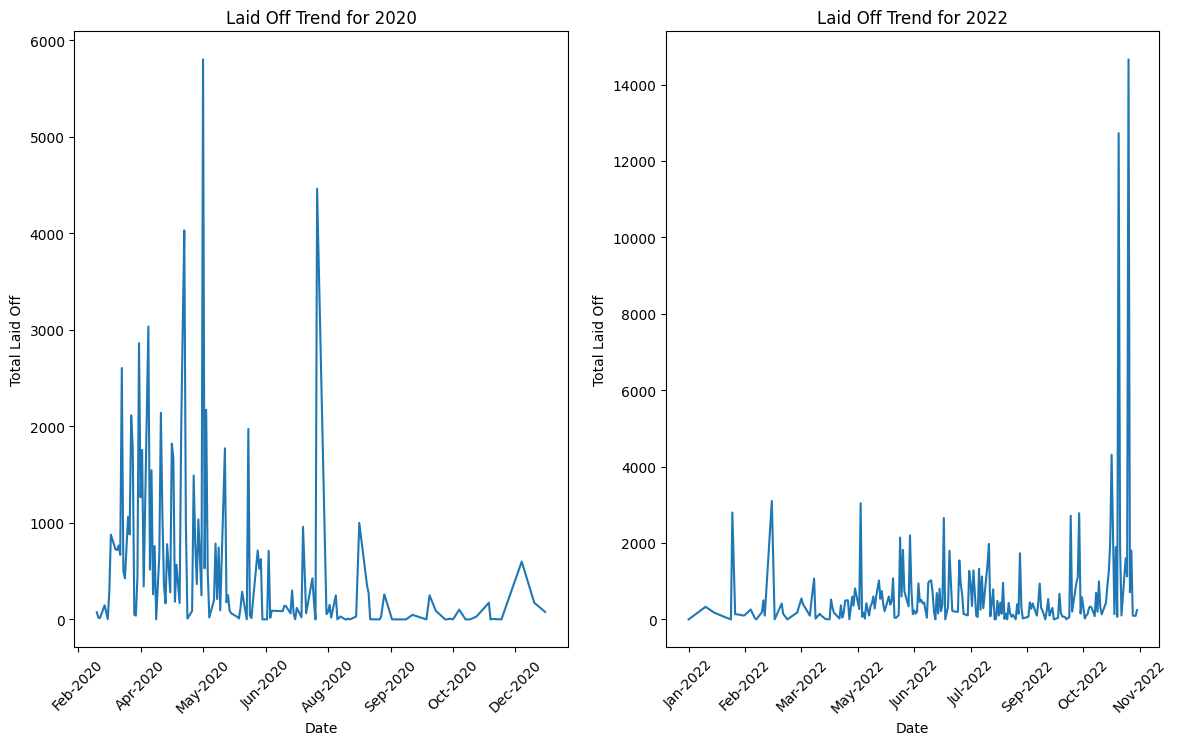

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator

# convert date column to datetime object
df_layoffs['date'] = pd.to_datetime(df_layoffs['date'])

# filter data to only include 2020 and 2022
df_filtered = df_layoffs[(df_layoffs['date'].dt.year == 2020) | (df_layoffs['date'].dt.year == 2022)]

# group data by year and calculate total layoffs
df_filtered['year'] = df_filtered['date'].dt.year
df_yearly = df_filtered.groupby(['year', 'date'])['total_laid_off'].sum().reset_index()

# create subplots and plot the data for each year in separate charts
fig, axs = plt.subplots(ncols=2, figsize=(14, 8))
for i, year in enumerate(df_yearly['year'].unique()):
    df_year = df_yearly.loc[df_yearly['year'] == year]
    axs[i].plot(df_year['date'], df_year['total_laid_off'])
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Total Laid Off')
    axs[i].set_title(f'Laid Off Trend for {year}')
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
    axs[i].tick_params(axis='x', rotation=45)
    locator = MaxNLocator(nbins=10)
    axs[i].xaxis.set_major_locator(locator)

plt.show()



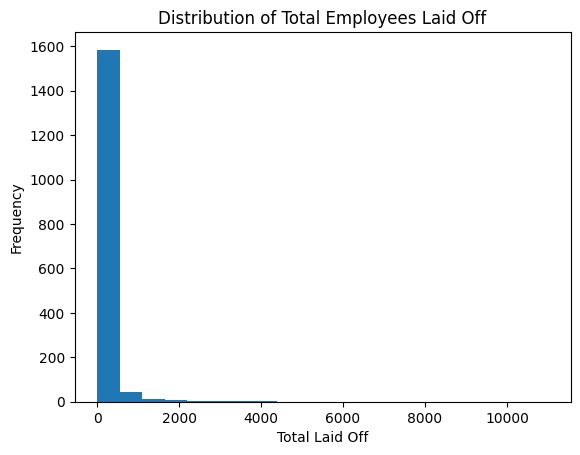

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a histogram of the "total_laid_off" variable
plt.hist(df_layoffs['total_laid_off'], bins=20)
plt.xlabel('Total Laid Off')
plt.ylabel('Frequency')
plt.title('Distribution of Total Employees Laid Off')
plt.show()


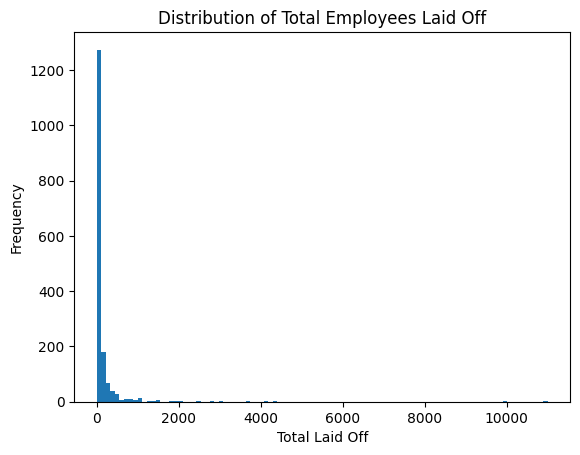

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a histogram of the "total_laid_off" variable
plt.hist(df_layoffs['total_laid_off'], bins=100)
plt.xlabel('Total Laid Off')
plt.ylabel('Frequency')
plt.title('Distribution of Total Employees Laid Off')
plt.show()


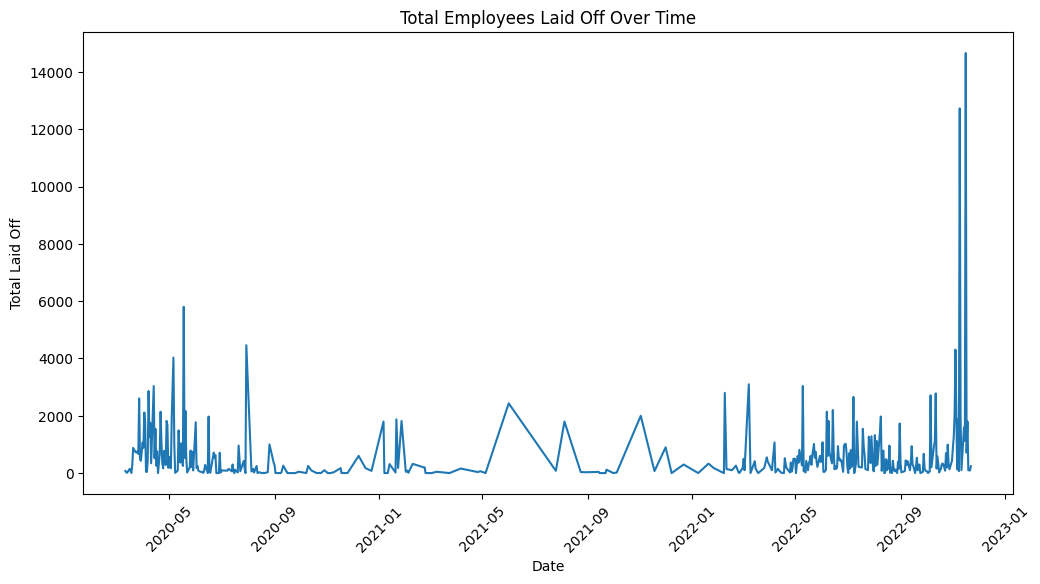

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Group the data by date and calculate the sum of "total_laid_off" for each date
df_grouped = df_layoffs.groupby('date')['total_laid_off'].sum()

# Create a line chart of the "total_laid_off" variable over time
plt.figure(figsize=(12, 6))
plt.plot(df_grouped.index, df_grouped.values)
plt.xlabel('Date')
plt.ylabel('Total Laid Off')
plt.title('Total Employees Laid Off Over Time')
plt.xticks(rotation=45)
plt.show()